In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("uciml/autompg-dataset")

print("Path to dataset files:", path)

# Check if path is a directory and if so, find the CSV file within it
if os.path.isdir(path):
    for filename in os.listdir(path):
        if filename.endswith(".csv"):
            filepath = os.path.join(path, filename)
            df = pd.read_csv(filepath)
            break  # Stop after reading the first CSV file
    else:
        print("No CSV file found in the downloaded directory.")
else:
    # If path is not a directory, assume it's a file and try to read it
    df = pd.read_csv(path)

100%|██████████| 6.31k/6.31k [00:00<00:00, 3.83MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/autompg-dataset/versions/3


In [3]:
print(df['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [4]:
# Replace '?' with NaN
df['horsepower'] = df['horsepower'].replace('?', np.nan)


In [5]:
# Convert horsepower to numeric (since '?' was a string, the column may still be object type)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Calculate the mean (ignoring NaN values)
mean_hp = df['horsepower'].mean()
print(f"Mean Horsepower: {mean_hp}")


Mean Horsepower: 104.46938775510205


In [6]:
# Fill NaN values with mean horsepower
df['horsepower'].fillna(mean_hp, inplace=True)

# Verify that there are no more missing values
print(df['horsepower'].isnull().sum())  # Should output 0


0


<ipython-input-6-3654a72b3223>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(mean_hp, inplace=True)


In [19]:
cats=list(df.select_dtypes(include=['object']).columns)
print(cats)

['car name']


In [20]:
nums=list(df.select_dtypes(exclude=['object']).columns)
print(nums)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


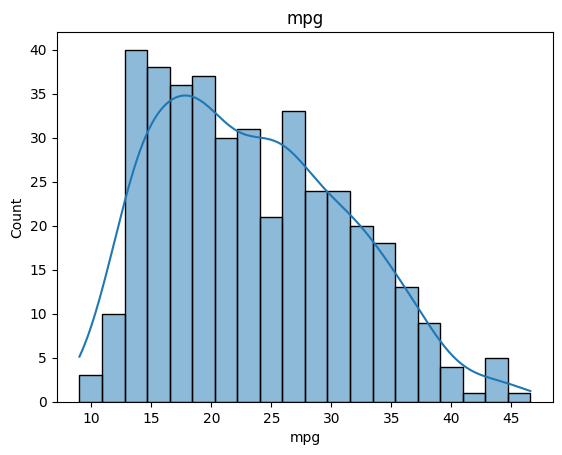

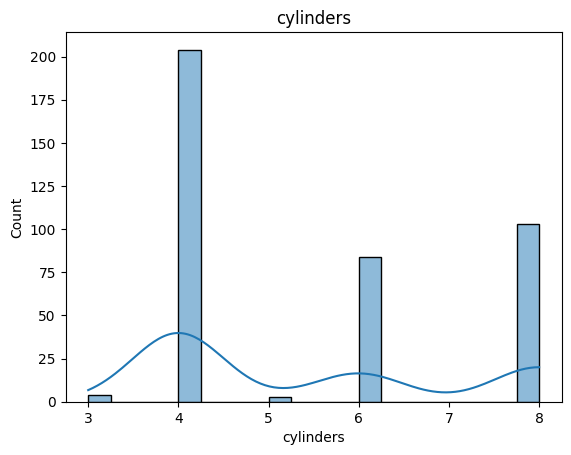

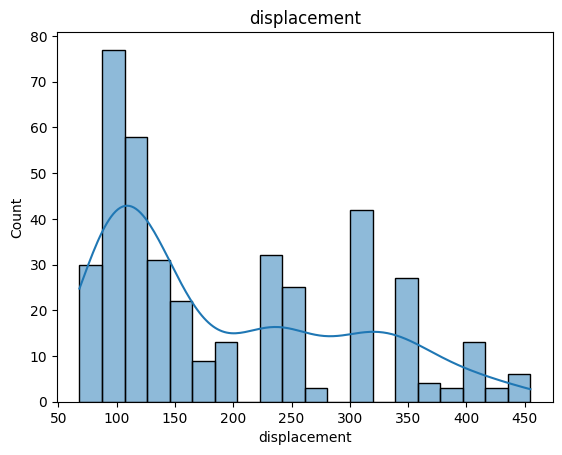

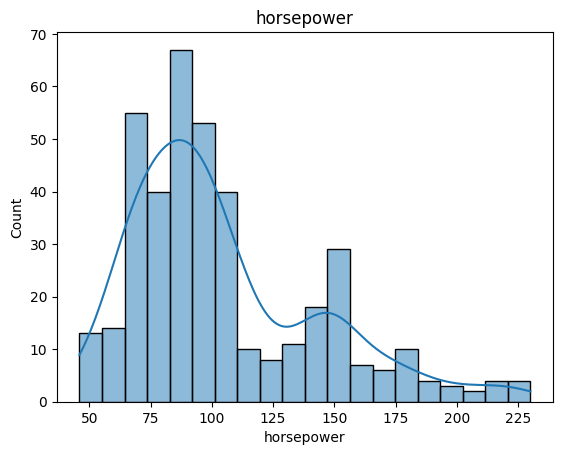

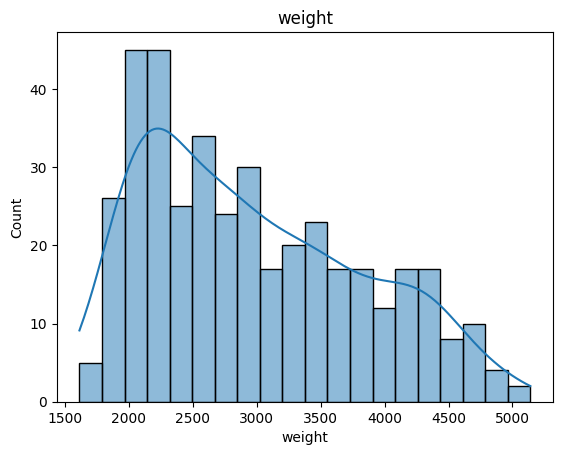

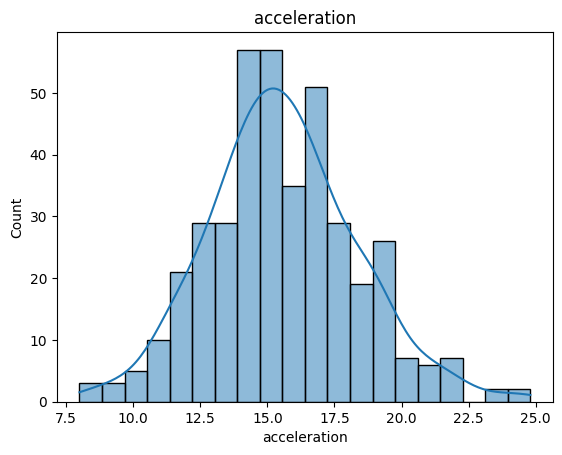

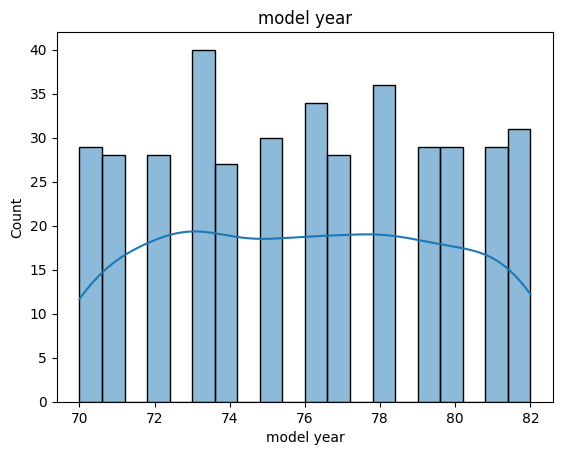

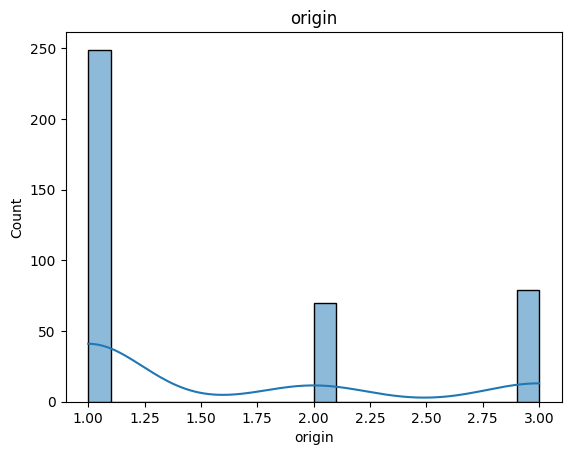

In [21]:
for column in nums:
  plt.figure()
  sns.histplot(df[column],bins=20,kde=True)
  plt.title(column)
  plt.show()

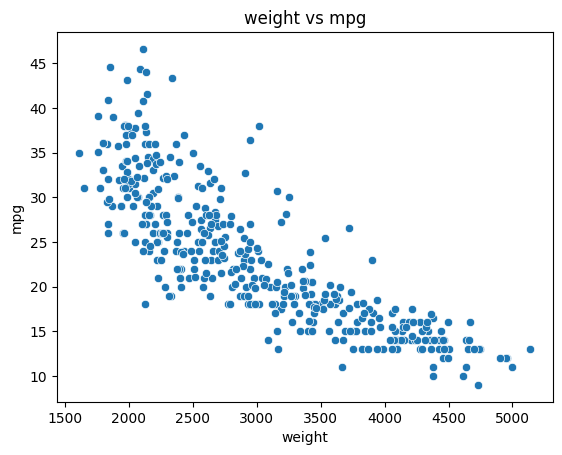

In [22]:
plt.figure()
sns.scatterplot(data=df,x='weight',y='mpg')
plt.title('weight vs mpg')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

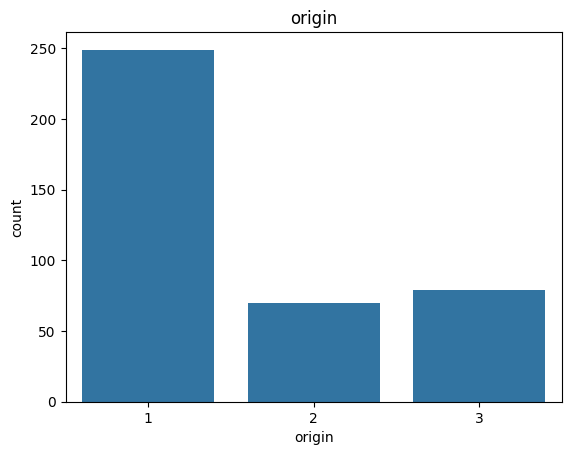

In [27]:
plt.figure()
sns.countplot(data=df,x='origin')
plt.title('origin')
plt.xlabel('origin')
plt.ylabel('count')
plt.show()

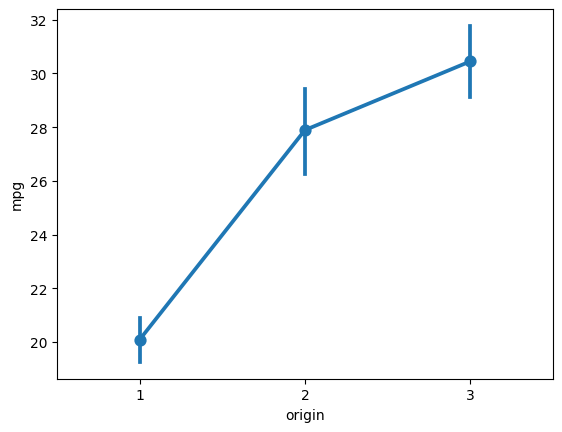

In [28]:
plt.figure()
sns.pointplot(data=df,x='origin',y='mpg')
plt.show()